In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define Widths and Amplitudes of Connectivity Matrix Subblocks

In [3]:
S = np.array([
    [ 0.025, 0.020],
    [ 0.025, 0.010]
])

A = np.array([
    [ 3.60, -3.15],
    [ 3.66, -3.15]
])

In [54]:
N = 96

fx = np.zeros((2,2,N))
x = np.arange(N)/N
x[x > 0.5] = 1 - x[x > 0.5]

def gauss(x,A,S):
    return A*np.exp(-0.5*x**2/S**2)

for i in range(2):
    for j in range(2):
        fx[i,j] = gauss(x,1,S[i,j])
        fx[i,j] *= 1/np.sum(fx[i,j])
        
fk = np.real(np.fft.fft(fx))

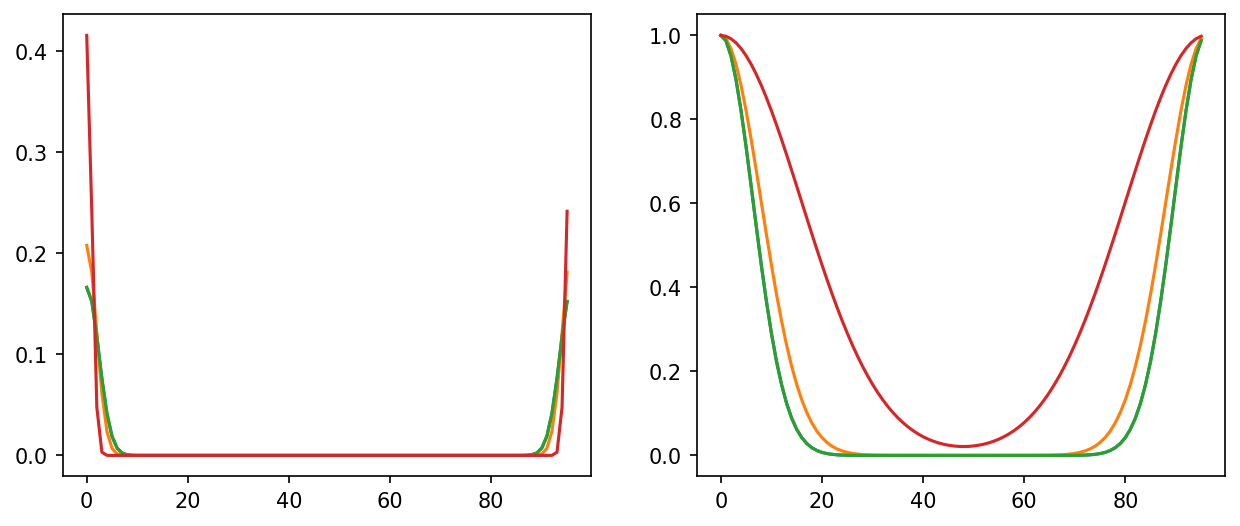

In [55]:
fig,axs = plt.subplots(1,2,figsize=(10,4),dpi=150)

axs[0].plot(fx.reshape((4,-1)).T)
axs[1].plot(fk.reshape((4,-1)).T)

plt.show()

In [154]:
Us = np.zeros((2,2,N,N),np.complex64)
Vs = np.zeros((2,2,N,N),np.complex64)
Σs = np.zeros((2,N,N),np.float64)
evals = np.zeros((2,N,N),np.complex64)
evecs = np.zeros((2,2,N,N),np.complex64)

for i in range(N):
    for j in range(N):
        Us[:,:,i,j],Σs[:,i,j],Vs[:,:,i,j] = np.linalg.svd(np.linalg.inv(np.eye(2)-fk[:,:,i]*fk[:,:,j]*A))
        Vs[:,:,i,j] = Vs[:,:,i,j].conj().T
        evals[:,i,j],evecs[:,:,i,j] = np.linalg.eig(fk[:,:,i]*fk[:,:,j]*A)

6 5
0.83429116 15.161391960067883
[0.8485537 +0.j 0.52910924+0.j]
[-0.8631452+0.j -0.5049559+0.j]


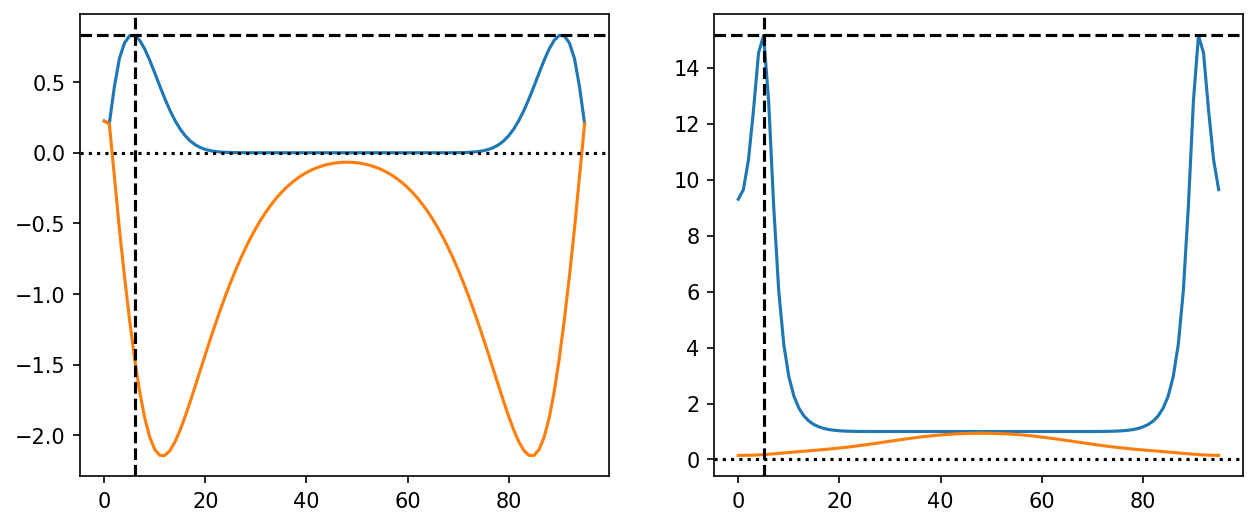

In [162]:
Σfreq = np.argmax(np.max(Σs[:,:,0],0))
if Σfreq > N//2: Σfreq = N - Σfreq
eigfreq = np.argmax(np.max(np.real(evals[:,:,0]),0))
if eigfreq > N//2: eigfreq = N - eigfreq

maxΣ = np.max(Σs[:,:,0])
maxeval = np.max(np.real(evals))

fig,axs = plt.subplots(1,2,figsize=(10,4),dpi=150)

axs[0].plot(np.real(evals[:,:,0]).T)
axs[0].axvline(eigfreq,c='k',ls='--')
axs[0].axhline(maxeval,c='k',ls='--')
axs[0].axhline(0,c='k',ls=':')

axs[1].plot(Σs[:,:,0].T)
axs[1].axvline(Σfreq,c='k',ls='--')
axs[1].axhline(maxΣ,c='k',ls='--')
axs[1].axhline(0,c='k',ls=':')

print(eigfreq,Σfreq)
print(maxeval,maxΣ)
print(evecs[:,0,eigfreq,0])
print(Us[:,0,eigfreq,0])

# Tune Amplitudes and Widths to 

In [178]:
def get_pref_mode(A,S,N=96):
    fx = np.zeros((2,2,N))
    x = np.arange(N)/N
    x[x > 0.5] = 1 - x[x > 0.5]

    def gauss(x,A,S):
        return A*np.exp(-0.5*x**2/S**2)

    for i in range(2):
        for j in range(2):
            fx[i,j] = gauss(x,1,S[i,j])
            fx[i,j] *= 1/np.sum(fx[i,j])
            
    fk = np.real(np.fft.fft(fx))
    
    Us = np.zeros((2,2,N,N),np.complex64)
    Vs = np.zeros((2,2,N,N),np.complex64)
    Σs = np.zeros((2,N,N),np.float64)
    evals = np.zeros((2,N,N),np.complex64)
    evecs = np.zeros((2,2,N,N),np.complex64)

    for i in range(N):
        for j in range(N):
            Us[:,:,i,j],Σs[:,i,j],Vs[:,:,i,j] = np.linalg.svd(np.linalg.inv(np.eye(2)-fk[:,:,i]*fk[:,:,j]*A))
            Vs[:,:,i,j] = Vs[:,:,i,j].conj().T
            evals[:,i,j],evecs[:,:,i,j] = np.linalg.eig(fk[:,:,i]*fk[:,:,j]*A)
            
    Σfreq = np.argmax(np.max(Σs[:,:,0],0))
    if Σfreq > N//2: Σfreq = N - Σfreq
    eigfreq = np.argmax(np.max(np.real(evals[:,:,0]),0))
    if eigfreq > N//2: eigfreq = N - eigfreq

    maxΣ = np.max(Σs[:,:,0])
    maxeval = np.max(np.real(evals))
    
    Σidx = np.argmax(Σs[:,Σfreq,0])
    
    return Σfreq, maxeval, np.abs(Us[0,Σidx,Σfreq,0])/np.abs(Us[1,Σidx,Σfreq,0])

In [179]:
get_pref_mode(A,S,N)

(5, 0.83429116, 1.5109669)

In [190]:
get_pref_mode(np.array([
    [ 2.90, -3.15],
    [ 3.66, -3.15]
]),np.array([
    [ 0.025, 0.020],
    [ 0.025, 0.010]
]),N)

(7, 0.32566172, 2.1521664)